This information fits a retrospective observational cohort comparison. Details

---

**Time Frame**
<br>
Data Collected over 2-Year Span

**Unit of Analysis**
<br>
Individual Child (`object`)

**Group Variable**
<br>
Parent Self-Reported SLD and/or ADHD (`string`, `bool`-like)

**Primary/Dependent Variable**
<br>
WPS, Words Per Sentence (`float`)

**Secondary/Independent Variables**
<br>
- Total Communication Score, PLS5/Bayley 4 (`float`) 
- Age in Months at Time of Testing (`int`) 
- Gender (`string`, `enum`-like) 
- Parent Demographics (`string[]`, where `string` is `enum`-like and/or `bool`-like) 
    - *Can also be used as covariates or descriptive balance*
---

**Research Question**:
<br>
Do DHH Children whose parents self-report a history of SLD and/or ADHD have significantly lower WPS scores compared to DHH children whose parents do not report such a history?

**Null**:
<br>
There is no difference in mean WPS scores between children of parents who self-report SLD/ADHD and those who do not.

**Alternate**:
<br>
There is a difference in WPS scores between the two groups.

**Analysis**:
<br>
Smaller sample, non-normality is likely.

---

**Descriptive**
- Mean, median, SD, min-max WPS by group
- Breakdowns of Age and Gender

**Inferential**
- Nonparametric Test: Mann-Whitney U test for WPS between the two groups
- T-Test if assumptions are met
- Effect Size: r or Cliff's delta to get interpretable magnitude, even with small n

**Covariate**
- ANCOVA with Age, if assumptions hold, or controlled through stratification/regression

**Supplementary**
- Correlation between WPS and PLS5/Bayley total scores
- Visualization via boxplot or scatterplot with group overlay

**Even with two small groups**
- Can vizualize each child's data point, not just group mean
- Can take case series approach; group trends supplemented by individual-level patterns; potentially powerful in developmental speech-language research with a low n (e.g. plotting age (x-axis) vs WPS (y-axis) and marking group by color)

---

**Reporting Structure**
- Participants
- n = Total children (xx parent self-report, xx no self-report)
- Age Range = xx (mean; SD)
- similar gender distribution accross groups

**Measures**
- WPS derived from attempted language sample
- PLS5/Bayley total score
- Parent self-report of SLD/ADHD

**Analysis**
- Nonparametric group comparison of WPS
- Effect size
- Descriptive statistics of age, gender, and language score
- Exploratory scatterplots and individual-level data presentation

**Regression (optional)**
- WPS = b~0 + (b~1 * Parent SLD/ADHD) + (b~2 * Age) + e
- Adjusted effect of parent sld/adhd on child wps
- quantitative estimate of effect size
- label options = "retrospective cohort comparison with small n" or "retrospective case series with group comparison" 


# Variable References

---

**ID** - `integer`
<br>

Values: any `integer`
<br>

**Gender** - `string`, `enum`-like
<br>

Values: `Male`, `Female`
<br>

**Birthdate** - `integer`
<br>

Values: any `integer`
<br>

**Evaluation_Date** - `integer`
<br>

Values: any `integer`
<br>

**Age_Day** - `integer`
<br>

Values: any `integer`
<br>

**Age_Month** - `float`
<br>

Values: any `float`
<br>

**Age_Month_Round** - `integer`
<br>

Values: any `integer`
<br>

**Age_Year** - `float`
<br>

Values: any `float`
<br>

**Age_Year_Round** - `float`
<br>

Values: any `float`
<br>

**Grade_Level** - `string`
<br>

Values: **not standardized**
<br>

**Home_Language** - `string`, `enum`-like
<br>

Values: `ASL`, `*English*`, `Spanish`, `ASL & English`, `ASL & Spanish`, `English & Spanish`, `ASL & English & Spanish` 
<br>

**Exposure_Deaf_Peers** - `string`, `bool`-like
<br>

Values: `Yes`, `No`
<br>

**Household_Status** - `string`, `enum`-like
<br>

Values: `Both Parents`, `Single Parent`, `All Other`
<br>

**Adoption_Status** - `string`, `bool`-like
<br>

Values: `Yes`, `No`
<br>

**Marital_Status** - `string`, `enum`-like
<br>

Values: `Married`, `Unmarried`, `All Other`
<br>

**Maternal_Education** - `string`, `enum`-like
<br>

Values: `College Degree`, `High School or Less`
<br>

**Indicator_SLD_Or_ADHD** - `string`, `bool`-like
<br>

Values: `Yes`, `No`
<br>

**Indicator_Any** - `string`, `bool`-like
<br>

Values: `Yes`, `No`
<br>

**Substance_Use_Any** - `string`, `bool`-like
<br>

Values: `Yes`, `No`
<br>

**Complication_Any** - `string`, `bool`-like
<br>

Values: `Yes`, `No`
<br>

**Birth_Condition** - `string`, `enum`-like
<br>

Values: `Excellent`, `Good`, `Fair`, `Poor`
<br>

**Aided_Side** - `string`, `enum`-like
<br>

Values: `Bilateral`, `Unilateral`, `None`
<br>

**Aided_Type** - `string`, `enum`-like
<br>

Values: `Hearing Aid`, `Cochlear Implant`, `Bone Conduction Device`, `Bimodal`, `None`
<br>

**Device_Usage** - `string`, `enum`-like
<br>

Values: `8+ Hr/Day`, `<8 Hr/Day`
<br>

**Family_History** - `string`, `bool`-like
<br>

Values: `Yes`, `No`
<br>

**Speech_Understanding_To_Family** - `string`, `enum`-like
<br>

Values: `75% or More`, `Less than 75%`
<br>

**Speech_Understanding_To_Others** - `string`, `enum`-like
<br>

Values: `75% or More`, `Less than 75%`
<br>

**Receptive_Similar_To_Peers** - `string`, `bool`-like
<br>

Values: `Yes`, `No`
<br>

**Expressive_Similar_To_Peers** - `string`, `bool`-like
<br>

Values: `Yes`, `No`
<br>

**Testing_Language** - `string`, `enum`-like
<br>

Values: `English`, `ASL & English`
<br>

**SLP** - `string`, `enum`-like
<br>

Values: `AT`, `CS`, `JK`, `AT/JK`
<br>

**WPS_Category** - `string`, `enum`-like
<br>

Values: `Met`, `Not Met`, `Not Given`
<br>

**WPS_Score** - `float`
<br>

Values: any `float`
<br>

**Instrument** - `string`, `enum`-like
<br>

Values: `Bayley`, `CELF5`, `CELP3`, `DAYC2`, `PLS5`, `RESCAE Rec/Exp`, `TACL/TEXL`, `TELD3`, `TOLDI5`, `TOLDP5`, `None Given`
<br>

**Language_Score** - `integer`
<br>

Values: any `integer`


In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.descriptivestats as ds
import warnings
from enum import Enum
from statsmodels.formula.api import ols

# Supress unwanted errors from script output
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
# Manually define a tab variable because \t isn't working right
# And I don't want to take the time to figure out why, when I can brute force it :)
tab = "        "

# Import data after exclusion from csv
df = pd.read_csv("/workspaces/codespaces-blank/data/final-dataset-aaa26.csv")
df_min = df[['ID', 'Gender', 'Birthdate', 'Evaluation_Date', 'Age_Day',
             'Age_Month_Round', 'Age_Year_Round', 'Home_Language_Simple', 
             'Household_Status', 'Marital_Status', 'Maternal_Education', 
             'Aided_Side', 'Aided_Type', 'Device_Usage', 'Testing_Language', 
             'SLP', 'WPS_Category', 'WPS_Score', 'Instrument', 'Language_Score']]
df_min.rename(columns={'Age_Day': 'Age_Days', 'Age_Month_Round': 'Age_Months',
                       'Age_Year_Round': 'Age_Years','Home_Language_Simple': 'Language',
                       'Household_Status': 'Household', 'Marital_Status': 'Marriage',
                       'Maternal_Education': 'Education', 'Aided_Side': 'Side', 
                       'Aided_Type': 'Type', 'Device_Usage': 'Usage', 
                       'Testing_Language': 'Test_Language', 'WPS_Score': 'WPS'},
                       inplace=True)
df_ess = df[['ID', 'Age_Month_Round', 'Home_Language_Simple', 'Household_Status', 
             'Marital_Status', 'Maternal_Education', 'Indicator_SLD_Or_ADHD', 'WPS_Category', 'WPS_Score']]
df_ess.rename(columns={'Age_Month_Round': 'Age', 'Home_Language_Simple': 'Language',
                       'Household_Status': 'Household', 'Marital_Status': 'Marriage', 
                       'Maternal_Education': 'Education', 'Indicator_SLD_Or_ADHD': 
                       'Indicator', 'WPS_Category': 'Category', 'WPS_Score': 'WPS'}, inplace=True)

filter = ['ASL', 'Spanish', 'Other', 'Unknown']
df_ess = df_ess[~df_ess['Language'].isin(filter)]
df_ess = df_ess[~df_ess['Category'].isin(['Not Given'])]


/tmp/ipykernel_3074/3971069466.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min.rename(columns={'Age_Day': 'Age_Days', 'Age_Month_Round': 'Age_Months',
/tmp/ipykernel_3074/3971069466.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ess.rename(columns={'Age_Month_Round': 'Age', 'Home_Language_Simple': 'Language',


In [48]:
# Descriptive Statistics:
# Count, Mean, Median, SD, min-max WPS and Language Scores by group
# Breakdowns of Age and Gender
# ==============================
grouped_stats = ['count', 'mean', 'median', 'std', 'min', 'max']
df_test_filter = df[df['Instrument'].isin({'PLS5', 'Bayley_language'})]

# sld_count = df[df['Indicator_SLD_Or_ADHD'] == 'Yes']
# age_grouped_df = df.groupby(['Age_Month_Round', 'Indicator_SLD_Or_ADHD'])
# age_grouped_df[['WPS_Score', 'Language_Score']].agg(grouped_stats).round(4)
# gender_grouped_df = df.groupby(['Home_Language_Simple', 'Indicator_SLD_Or_ADHD'])
#gender_grouped_df[['WPS_Score', 'Language_Score', 'Age_Month_Round']].agg(grouped_stats).round(4)
#education_grouped_df = df.groupby(['Maternal_Education', 'Indicator_SLD_Or_ADHD'])
#education_grouped_df[['WPS_Score', 'Language_Score', 'Age_Month_Round']].agg(grouped_stats).round(4)

#grouped_df = df_ess.groupby['Category']
#grouped_df['Language', 'Household', 'Marriage', 'Education', 'Indicator'].agg(grouped_stats).round(4)
df_ess.groupby('Category')[['Language', 'Household', 'Marriage', 'Education', 'Indicator']].count()


,Language,Household,Marriage,Education,Indicator
Category,,,,,
Met,18,18,18,17,17
Not Met,32,32,31,31,31


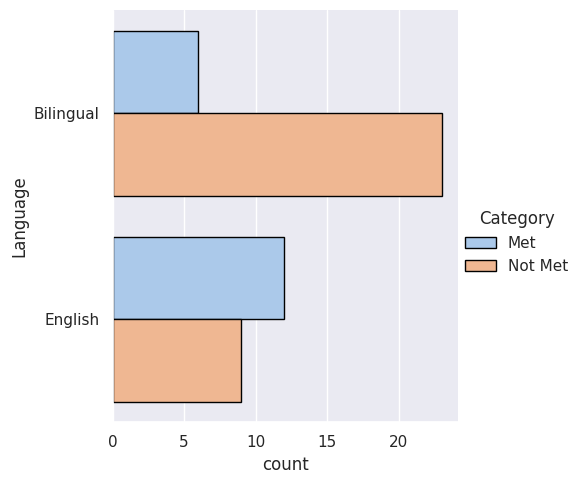

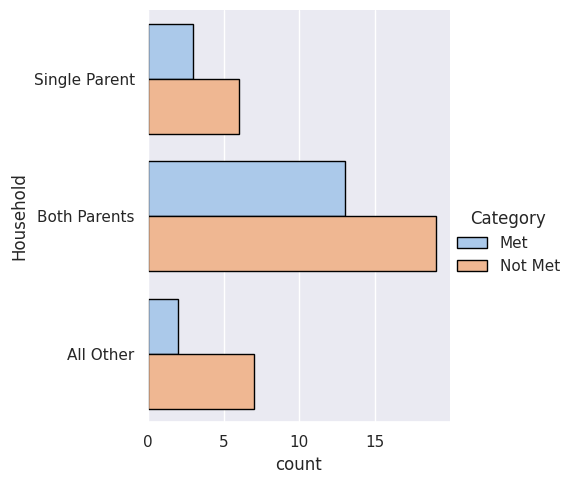

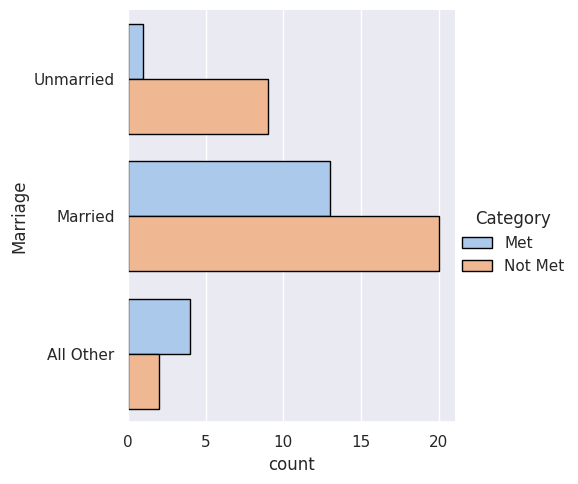

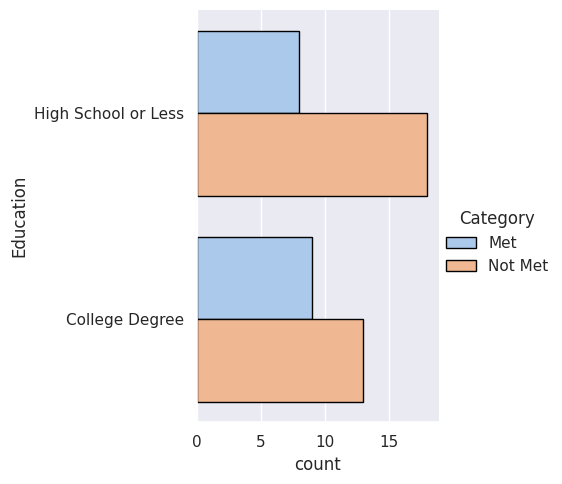

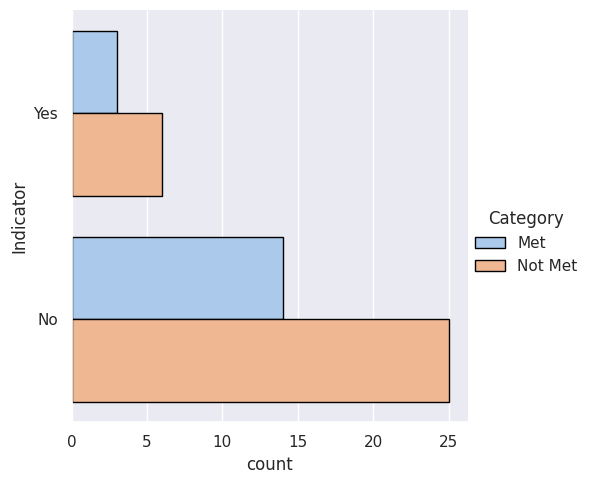

In [ ]:
# Apply theme and color palette
sns.set_theme()

# Create catplot of WPS Score by Maternal Education and by SLD/ADHD
#sns.catplot(
#    data=df_ess, x='WPS', y="Education", hue="Language", 
#    kind='violin', inner='stick', split=True
#)
#sns.catplot(
#    data=df_ess, x='WPS', y="Indicator", hue="Education", 
#    kind='violin', inner='stick', split=True
#)
['Language', 'Household', 'Marriage', 'Education', 'Indicator']
for group in groups:
    sns.catplot(
       data=df_ess, y=group, hue='Category', kind='count',
       palette='pastel', edgecolor='black'
    )





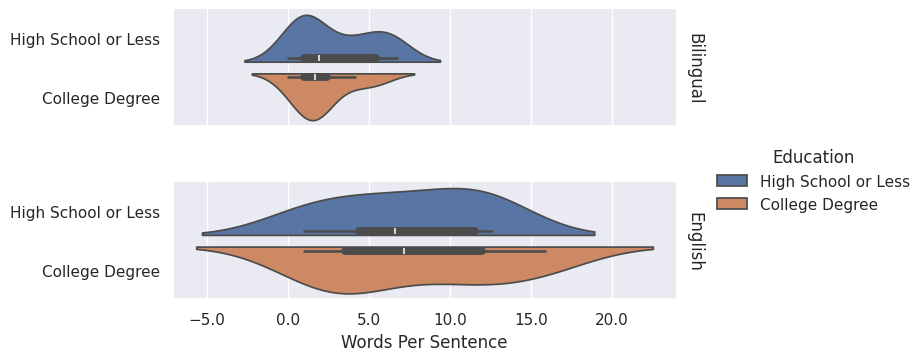

In [7]:
g = sns.catplot(
    data=df_ess, x="WPS", y="Education", row="Language", hue='Education',
    kind='violin', split=True, orient='h', sharex=True, margin_titles=True, 
    height=2, aspect=4
)
g.set(xlabel="Words Per Sentence", ylabel="")
g.set_titles(row_template="{row_name}")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('{x:.1f}')

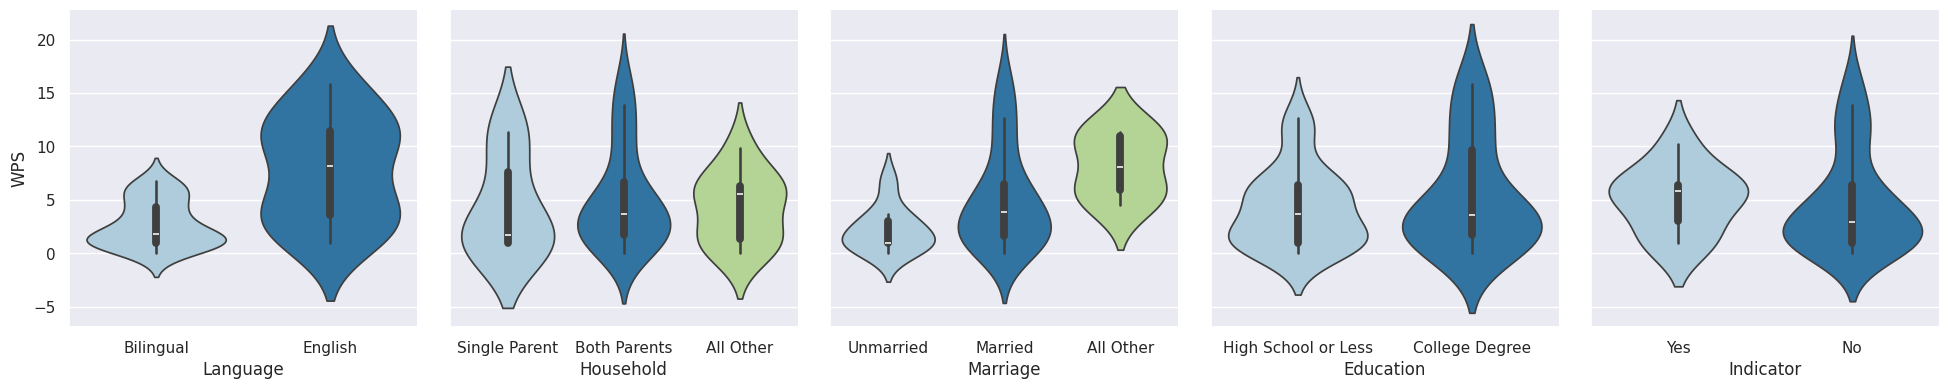

In [11]:
x_vars=['Language', 'Household', 'Marriage', 'Education', 'Indicator']
p = sns.PairGrid(data=df_ess, y_vars=['WPS'], x_vars=x_vars, height=4, palette='Paired')
p.map(sns.violinplot)
# p.set(ylim=(0, df_ess['WPS'].max()))